# Removing Outlier from a sample data

In [ ]:
import numpy as np

In [ ]:
# Sample dataset
data = [7, 15, 36, 39, 40, 41, 42, 43, 47, 49]

In [ ]:
# Calculate Q1, Q2, and Q3
Q1 = np.quantile(data, 0.25)
Q2 = np.quantile(data, 0.50)
Q3 = np.quantile(data, 0.75)

Q1, Q2, Q3


(np.float64(36.75), np.float64(40.5), np.float64(42.75))

In [ ]:
print(np.quantile(data, [0.25,0.5,0.75]))

[36.75 40.5  42.75]


Quantiles are values that split sorted data or a probability distribution into equal parts.

In general terms, a q-quantile divides sorted data into q parts.

In [ ]:
# Calculate the IQR
IQR = Q3 - Q1
IQR

np.float64(6.0)

## Boxplot

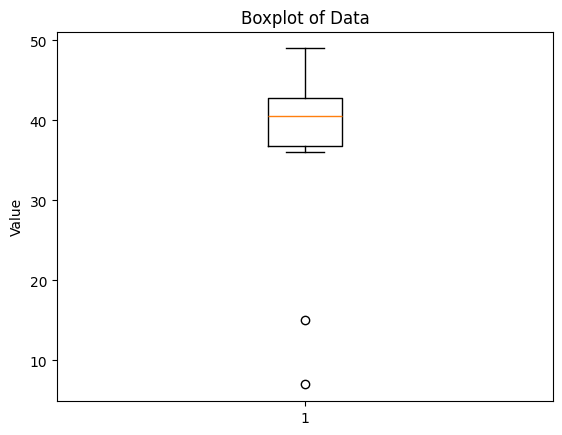

In [ ]:
import matplotlib.pyplot as plt
# Boxplot to visualize quartiles and IQR
plt.boxplot(data)
plt.title('Boxplot of Data')
plt.ylabel('Value')
plt.show()

In [ ]:
np.median(data)

np.float64(40.5)

## Outliers

In [ ]:
# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: 27.75
Upper bound: 51.75


The whiskers extend to the most extreme values within these bounds:


*   Lower Whisker: The smallest data point greater than or equal to 27. 75, which is 36.
*   Upper Whisker: The largest data point less than or equal to 51.75, which is 49.

In [ ]:
# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
# Any data point below the Lower Bound or above the Upper Bound is
#considered an outlier.

# Output the results
outliers

[7, 15]

## Removing Outliers

In [ ]:
data = [x for x in data if x >= lower_bound and x <= upper_bound]

In [ ]:
data

[36, 39, 40, 41, 42, 43, 47, 49]

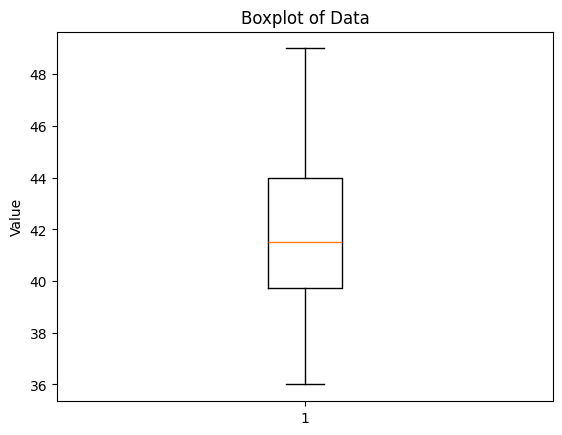

In [ ]:
# Boxplot after removing outliers
plt.boxplot(data)
plt.title('Boxplot of Data')
plt.ylabel('Value')
plt.show()


In [ ]:
print(np.quantile(data, [0.25,0.5,0.75]))

[39.75 41.5  44.  ]


# Removing Outliers from a DataSet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from scipy.stats import zscore

# Load dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


## IQR Method

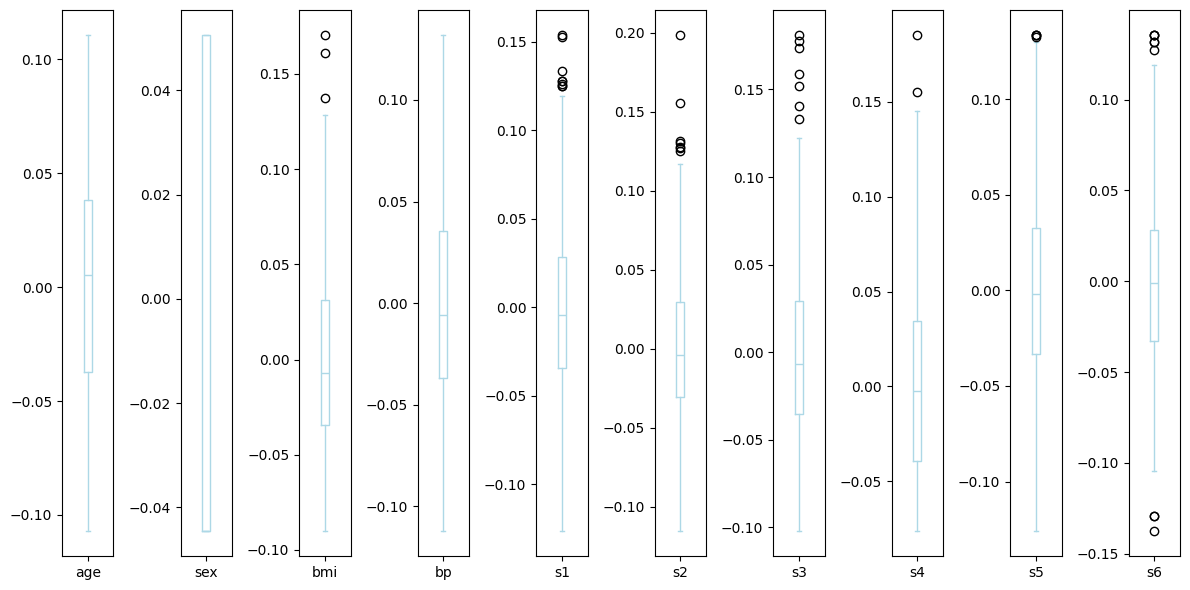

In [ ]:
# Plotting boxplots for each feature
df.plot(kind='box', subplots=True, layout=(1, 10), figsize=(12, 6), color='lightblue')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(data):
    df_cleaned = data.copy()
    for feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) &
         (df_cleaned[feature] <= upper_bound)]
    return df_cleaned

df_cleaned_iqr = remove_outliers_iqr(df)

In [ ]:
# Print results
print("Original data shape:", df.shape)
print("Cleaned data shape (IQR):", df_cleaned_iqr.shape)

Original data shape: (442, 10)
Cleaned data shape (IQR): (411, 10)


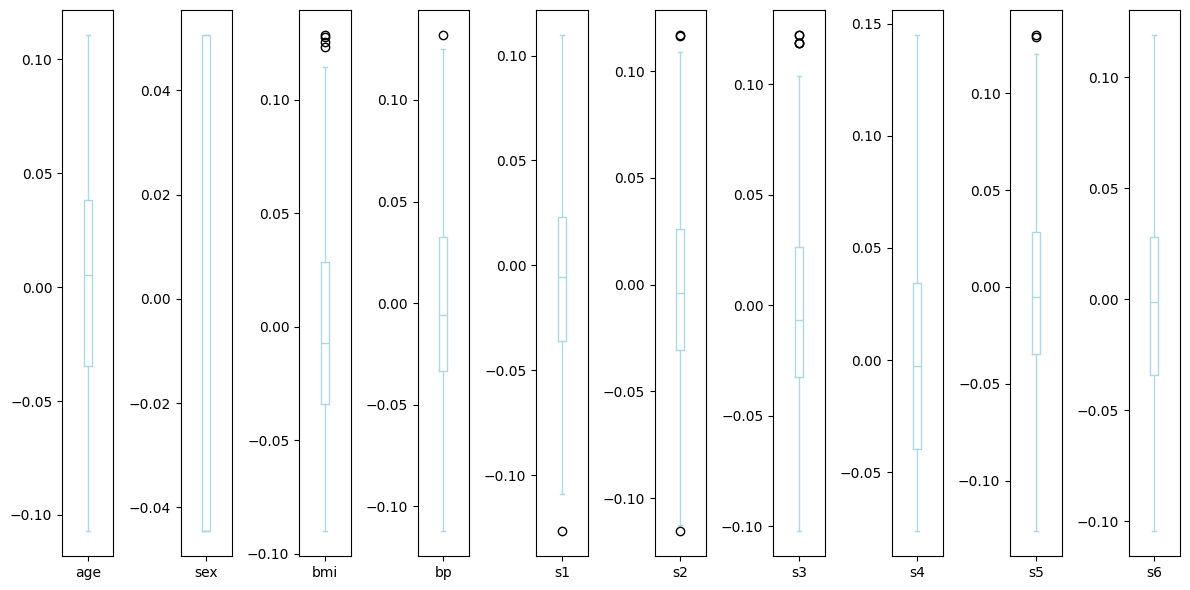

In [ ]:
# Plotting boxplots for each feature
df_cleaned_iqr.plot(kind='box', subplots=True, layout=(1, 10), figsize=(12, 6), color='lightblue')
plt.tight_layout()
plt.show()

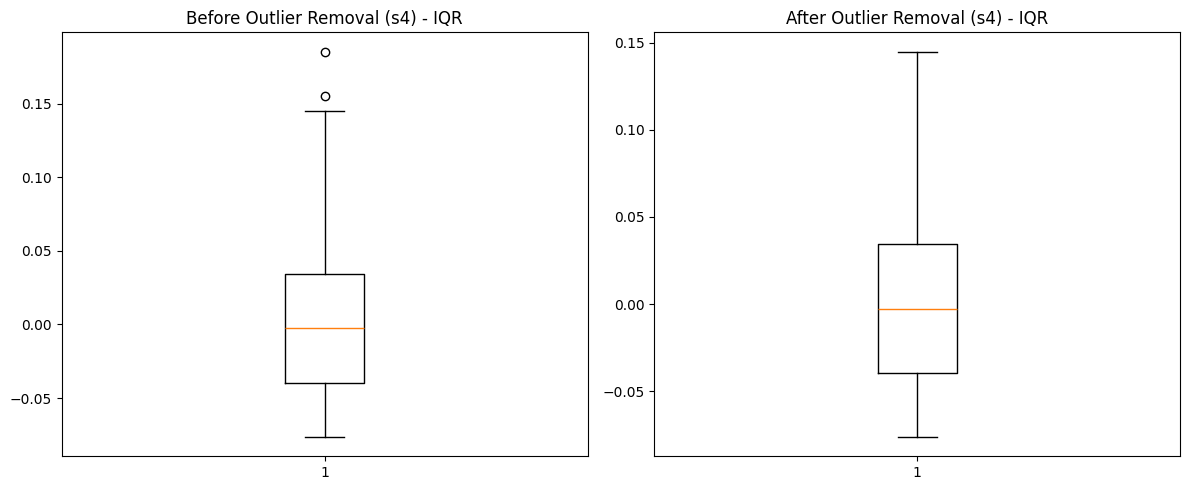

In [ ]:
# Select a feature for visualization
feature = 's4'
# Plot before and after boxplots for IQR method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df[feature])
plt.title(f'Before Outlier Removal ({feature}) - IQR')

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned_iqr[feature])
plt.title(f'After Outlier Removal ({feature}) - IQR')
plt.tight_layout()
plt.show()


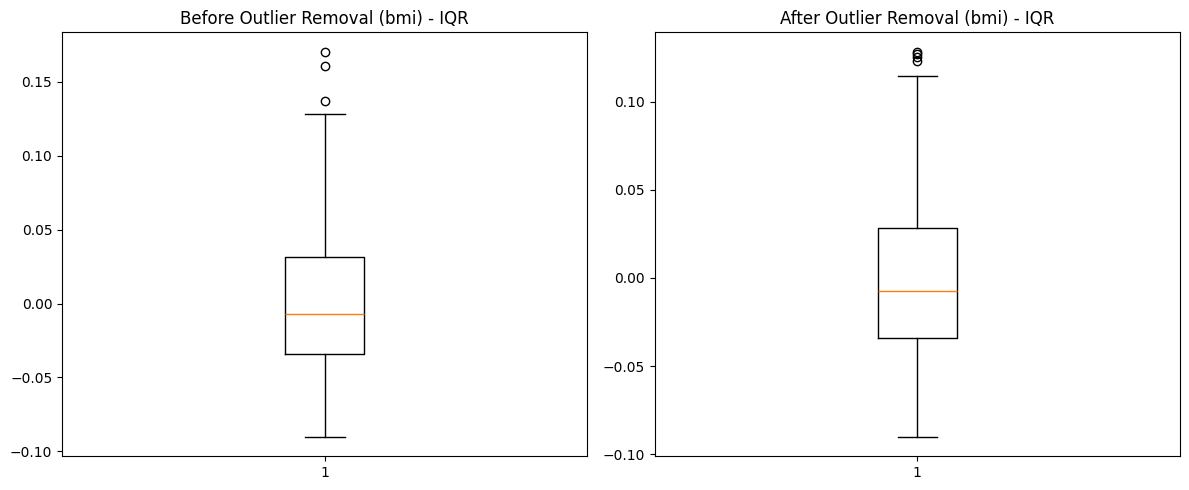

In [ ]:
# Select a feature for visualization
feature = 'bmi'
# Plot before and after boxplots for IQR method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df[feature])
plt.title(f'Before Outlier Removal ({feature}) - IQR')

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned_iqr[feature])
plt.title(f'After Outlier Removal ({feature}) - IQR')

plt.tight_layout()
plt.show()


## Z Score Method

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from scipy.stats import zscore

# Load dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Select feature
feature = 'bp'
# Compute Z-score only for bp
z_scores_bp = np.abs(zscore(df[feature]))
# Threshold
threshold = 2
# Filter data by removing outliers only based on bp
df_cleaned_z = df[z_scores_bp < threshold]

print("Original shape:", df.shape)
print("After Z-score outlier removal:", df_cleaned_z.shape)


Original shape: (442, 10)
After Z-score outlier removal: (423, 10)


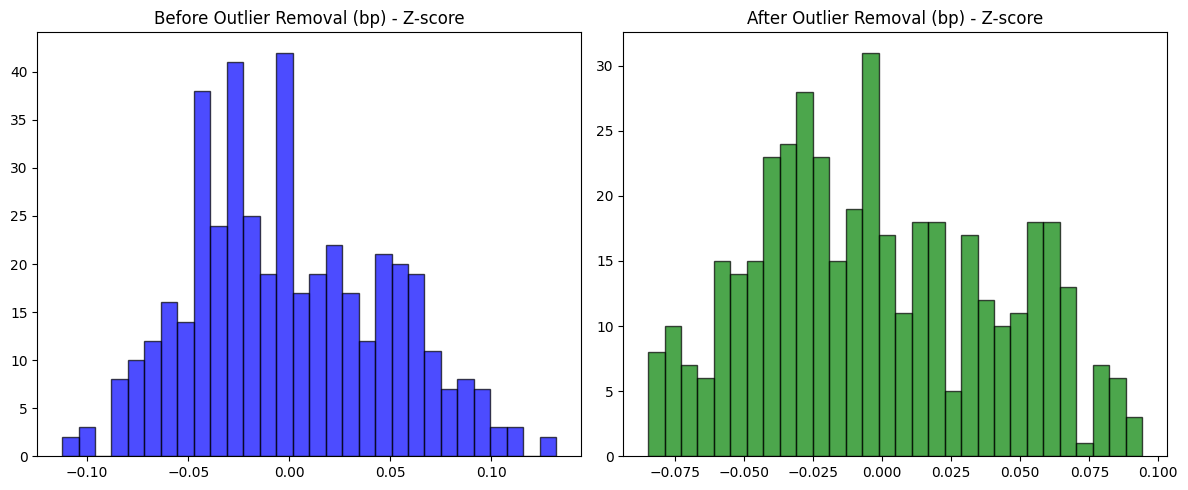

In [ ]:
# Plot before and after histograms for Z-score method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[feature], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Before Outlier Removal ({feature}) - Z-score')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned_z[feature], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title(f'After Outlier Removal ({feature}) - Z-score')

plt.tight_layout()
plt.show()

